In [11]:
# Import the required libraries and modules for building the model
import numpy as np
import keras
import matplotlib.pyplot as plt
import pandas as pd
import vs as vs
from IPython.display import display
%matplotlib inline

In [2]:
# Now, load the data into the model
try:
    data = pd.read_csv("GalaxyZoo1_DR_table2.csv")
    data['RESULTS'] = data['SPIRAL'] + 2*data['ELLIPTICAL'] + 3 * data['UNCERTAIN']
    data.drop(['OBJID', 'RA', 'DEC', 'SPIRAL', 'ELLIPTICAL', 'UNCERTAIN'], axis = 1, inplace = True)
except :
    print ("Dataset could not be loaded. Is the dataset missing?")
display(data.head())

,NVOTE,P_EL,P_CW,P_ACW,P_EDGE,P_DK,P_MG,P_CS,P_EL_DEBIASED,P_CS_DEBIASED,RESULTS
0,59,0.610,0.034,0.000,0.153,0.153,0.051,0.186,0.610,0.186,3
1,18,0.611,0.000,0.167,0.222,0.000,0.000,0.389,0.203,0.797,1
2,68,0.735,0.029,0.000,0.147,0.074,0.015,0.176,0.432,0.428,3
3,52,0.885,0.019,0.000,0.058,0.019,0.019,0.077,0.885,0.077,2
4,59,0.712,0.000,0.000,0.220,0.068,0.000,0.220,0.640,0.290,3


In [3]:
# Data is to be preprocessed using one hot encoder
from sklearn.preprocessing import OneHotEncoder

OHE = OneHotEncoder(categorical_features = [1])

x = data.drop(['RESULTS'], axis = 1, inplace = False)
y = data['RESULTS']
x = x.fillna(x.mean())
y = y.fillna(y.mean())

OHE.fit(x)

# Building train, test sets for training and evaluating

from sklearn.cross_validation import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size = 0.3)

/usr/local/lib/python3.4/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
# Train the model using RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier # importing classifier

# initializing classifier
Randomforest_classifier = RandomForestClassifier(max_depth = 17, random_state = 42, verbose = True)

Randomforest_classifier.fit(x_train, y_train) # fit the classifier to train on the training set

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   24.6s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=17, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=True, warm_start=False)

In [5]:
# Train the model using MLPClassifier
from sklearn.neural_network import MLPClassifier # importing classifier

# initializing classifier
MLP_classifier = MLPClassifier(hidden_layer_sizes = (7, 12, 12, 12, 21, 12, 12, 12, 7), max_iter = 1000, verbose = True)

MLP_classifier.fit(x_train, y_train) # fit the classifier to train on the training set

Iteration 1, loss = 0.41678496
Iteration 2, loss = 0.33371684
Iteration 3, loss = 0.30713228
Iteration 4, loss = 0.26546475
Iteration 5, loss = 0.25693156
Iteration 6, loss = 0.25377010
Iteration 7, loss = 0.25263145
Iteration 8, loss = 0.24953637
Iteration 9, loss = 0.24956839
Iteration 10, loss = 0.24575794
Iteration 11, loss = 0.24340907
Iteration 12, loss = 0.23872085
Iteration 13, loss = 0.23640633
Iteration 14, loss = 0.23444116
Iteration 15, loss = 0.23294443
Iteration 16, loss = 0.23190310
Iteration 17, loss = 0.23007387
Iteration 18, loss = 0.22900180
Iteration 19, loss = 0.22840367
Iteration 20, loss = 0.22842326
Iteration 21, loss = 0.22597930
Iteration 22, loss = 0.22623782
Iteration 23, loss = 0.22464546
Iteration 24, loss = 0.22345491
Iteration 25, loss = 0.22454024
Iteration 26, loss = 0.22293980
Iteration 27, loss = 0.22308562
Iteration 28, loss = 0.22308418
Iteration 29, loss = 0.22278052
Iteration 30, loss = 0.22142034
Iteration 31, loss = 0.22257530
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(7, 12, 12, 12, 21, 12, 12, 12, 7),
       learning_rate='constant', learning_rate_init=0.001, max_iter=100000,
       momentum=0.9, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

In [7]:
# Evaluate the model using f1_score over test set

from sklearn.metrics import f1_score # importing evaluation metrics

# predict the output for testing set using random forest classifier
Randomforest_predictions = Randomforest_classifier.predict(x_test)

# predict the output for testing set using MLP classifier
MLP_predictions = MLP_classifier.predict(x_test)

# determine f1_score for radom forest classifier
Randomforest_score_macro = f1_score(y_test, Randomforest_predictions, average = 'macro')
Randomforest_score_micro = f1_score(y_test, Randomforest_predictions, average = 'micro')
Randomforest_score_None = f1_score(y_test, Randomforest_predictions, average = None)

# determine f1_score for MLP classifier
MLP_score_macro = f1_score(y_test, MLP_predictions, average = 'macro')
MLP_score_micro = f1_score(y_test, MLP_predictions, average = 'micro')
MLP_score_None = f1_score(y_test, MLP_predictions, average = None)

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.6s finished


In [8]:
# display all the scores
print("Randomforest scores :", end = ("\n"))
print("macro : " , Randomforest_score_macro)
print("micro : " , Randomforest_score_micro)
print("None : " , Randomforest_score_None)
print("MLP scores :", end = ("\n"))
print("macro : " , MLP_score_macro)
print("micro : " , MLP_score_micro)
print("None : " , MLP_score_None)

Randomforest scores :
macro :  0.878606524596
micro :  0.900950175663
None :  [ 0.87920844  0.83618622  0.92042491]
MLP scores :
macro :  0.867826682279
micro :  0.889651868413
None :  [ 0.87660838  0.81898165  0.90789002]


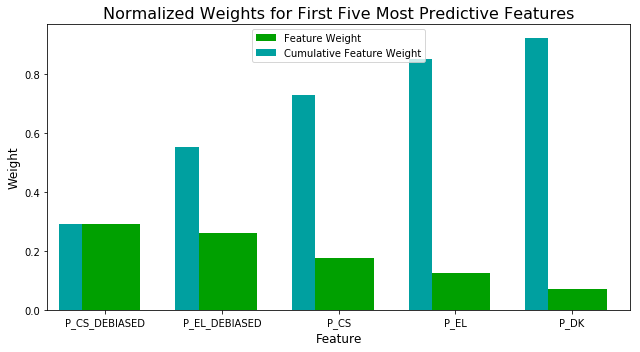

In [12]:
# visualising the mostimportant features
importances = Randomforest_classifier.feature_importances_
vs.feature_plot(importances, x_train, y_train)